In [11]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_excel("E:\ExcelR Assignment\Assignment 18 - Forecasting\CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.shape

(42, 2)

<AxesSubplot:>

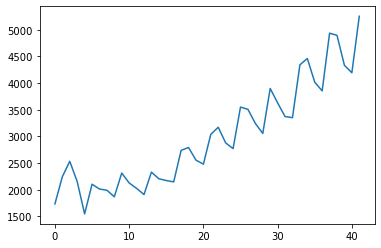

In [4]:
df.Sales.plot()

### So this plot is upward trending with Additive Seasonality

In [5]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


## Let's make a Data Driven Model approach

### Splitting data

In [7]:
Train = df.head(32)
Test = df.tail(10)

## Moving Average

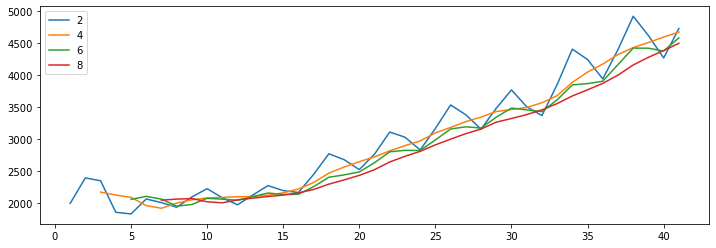

In [8]:
plt.figure(figsize=(12,4))
for i in range(2, 9, 2):
    df["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

### Time Series Decomposition Plot

<Figure size 864x720 with 0 Axes>

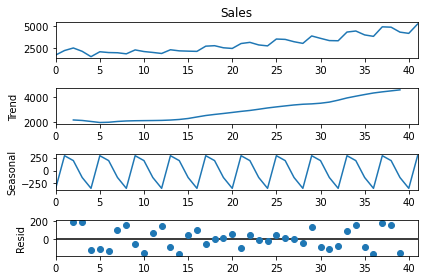

In [20]:
plt.figure(figsize=(12,10))
decompose_ts_add = seasonal_decompose(df.Sales,period=4)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

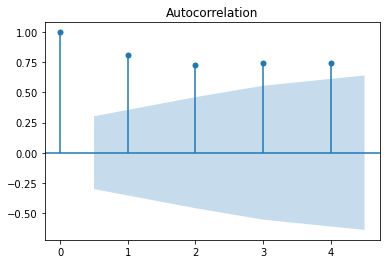

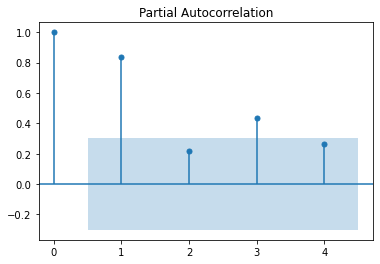

In [21]:
tsa_plots.plot_acf(df.Sales,lags=4)
tsa_plots.plot_pacf(df.Sales,lags=4)
plt.show()

### Evaluation Metric MAPE

In [13]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [22]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.724050894845657

### Holt method 

In [23]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

<ipython-input-23-bd0ef4e2b52c>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


16.720651408891925

### Holts winter exponential smoothing with additive seasonality and additive trend

In [26]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

10.578889308310785

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [27]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

11.423882127430725

## So Holts method with Additive Seasonality and Additive Trend is best model

### Final Model by combining train and test

In [28]:
hwe_model_add_add = ExponentialSmoothing(df["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model

In [29]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    5209.703418
43    4684.532094
44    4573.170233
45    5661.700735
46    5593.184862
47    5068.013538
48    4956.651676
49    6045.182178
50    5976.666305
51    5451.494981
dtype: float64